# **Creating the model**
1. [Variable Distribution](#Variable-Distribution)
2. [Log Normalization](#Log-Normalization)
3. [Heatmap](#Heatmap)
4. [OLS](#OLS)
5. [Training and Testing with MSE and MAE](#Training-and-Testing)
6. [Cross-Validation](#Cross-Validation)

In [38]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [39]:
data_pred = ['price', 'bedrooms', 'sqft_lot', 'grade', 
            'waterfront', 'yr_built', 'yr_renovated', 'zipcode']
target = df['price']


## Variable Distribution

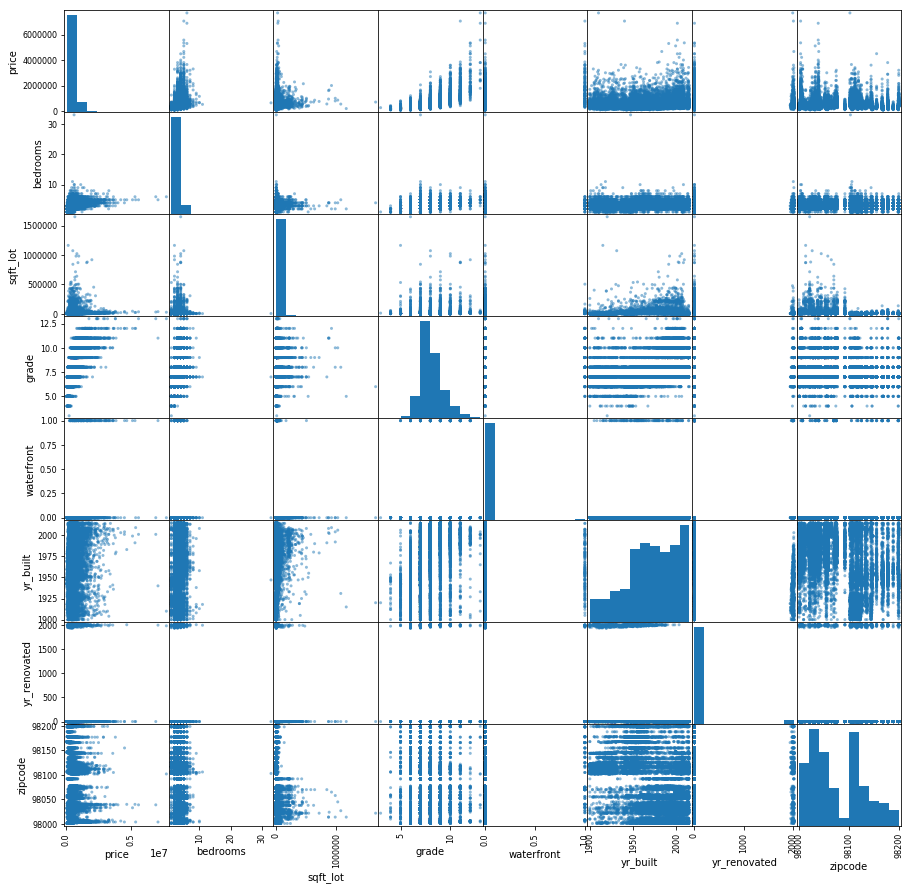

In [40]:
pd.plotting.scatter_matrix(df[data_pred],figsize  = [15, 15]);


## Log Normalization

In [ ]:
# Min-Max Scaling, Standardization, Mean Normalization, Unit/Vector Transformation 
# can be explored as possibilities as well

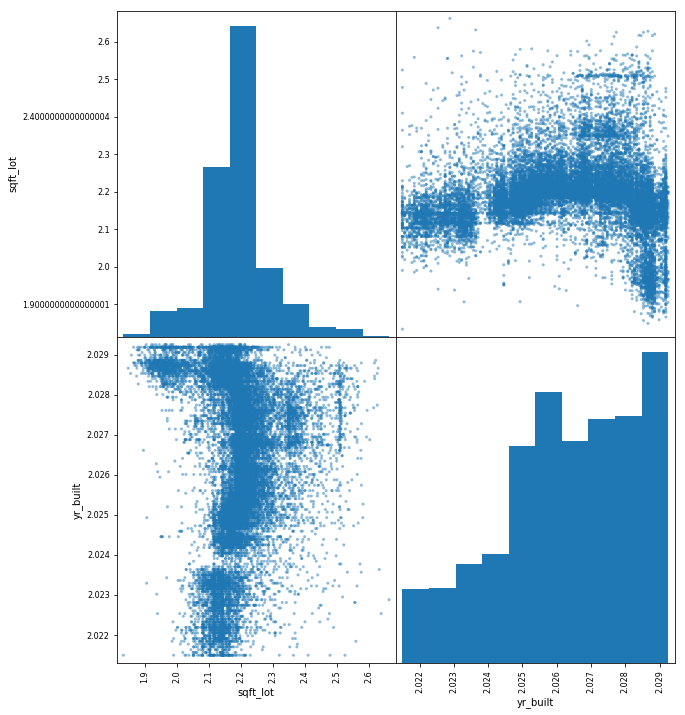

In [42]:
#it looks like these two variables could use a log normalization
#to closer resemble a normal distribution
non_normal = ['sqft_lot', 'yr_built']
for feat in non_normal:
    df[feat] = df[feat].map(lambda x: np.log(x))
pd.plotting.scatter_matrix(df[non_normal], figsize=(10,12));

## Heatmap

In [ ]:
data_heatmap = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 
                   'sqft_living15', 'sqft_lot15','waterfront', 'view', 'yr_renovated', 'zipcode', 'lat', 'long']]

In [ ]:
data_heatmap.corr()


In [ ]:
#tried to group warm and cool areas of heatmap together (cool starting with waterfront)
#still need to run with cleaned data
sns.heatmap(data_heatmap.corr(), center=0);


In [ ]:
#latitude isn't a strong correlation with zipcode, long is inverse
# ..Why? Shape of King County is tall but narrow?

In [ ]:
df.dtypes

## OLS

In [ ]:
curated_pred = df[['sqft_lot', 'zipcode', 'grade']]

In [ ]:
#higher Fstat for curated_pred compared with other_pred below

model = sm.OLS(target, curated_pred).fit()
model.summary()

In [ ]:
other_pred = df[['bedrooms', 'yr_built']]

In [ ]:
model = sm.OLS(target, other_pred).fit()
model.summary()

## Training and Testing

In [ ]:
x = curated_pred
y = target

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
print(len(x_train), len(x_test), len(y_train), len(y_test))

In [ ]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

y_hat_train = linreg.predict(x_train)
y_hat_test = linreg.predict(x_test)

In [ ]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [ ]:
# mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
# mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
# print('Train Mean Squarred Error:', mse_train)
# print('Test Mean Squarred Error:', mse_test)

### MSE

In [ ]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

In [ ]:
num = 20
train_err = []
test_err = []
for i in range(num):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    linreg.fit(x_train, y_train)
    y_hat_train = linreg.predict(x_train)
    y_hat_test = linreg.predict(x_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(list(range(num)), train_err, label='Training Error')
plt.scatter(list(range(num)), test_err, label='Testing Error')
plt.legend();

### MAE

In [ ]:
#MAE - Mean Absolute Error -  Seems to be more valuable here
mean_absolute_error(y_test, y_hat_test)
mean_absolute_error(y_train, y_hat_train)

In [ ]:
num = 20
train_err = []
test_err = []
for i in range(num):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    linreg.fit(x_train, y_train)
    y_hat_train = linreg.predict(x_train)
    y_hat_test = linreg.predict(x_test)
    train_err.append(mean_absolute_error(y_train, y_hat_train))
    test_err.append(mean_absolute_error(y_test, y_hat_test))
plt.scatter(list(range(num)), train_err, label='Training Error')
plt.scatter(list(range(num)), test_err, label='Testing Error')
plt.legend();

## Cross-Validation

In [ ]:
cv_5_results = np.mean(cross_val_score(linreg, x, y, cv=5, scoring="neg_mean_squared_error"))
cv_10_results = np.mean(cross_val_score(linreg, x, y, cv=10, scoring="neg_mean_squared_error"))
cv_20_results = np.mean(cross_val_score(linreg, x, y, cv=20, scoring="neg_mean_squared_error"))

In [ ]:
print(cv_5_results)
print(cv_10_results)
print(cv_20_results)